<a href="https://colab.research.google.com/github/anjalixprakash/Prediction-of-Product-Sales/blob/main/prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
Anjali Prakash

## Project Overview


## Load and Inspect Data



In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required packages
import pandas as pd

# Save the filepath and load the data as "df"
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)

In [ ]:
# Display the first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Display the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


According to the info, there are 12 columns and 8523 rows in this data frame.

## Clean Data

In [ ]:
# Check the data types of the data set
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# Check for duplicate rows
duplicated_rows = df.duplicated()
df.duplicated().sum()

0

There are 0 duplicate rows in this data set.

In [ ]:
# Get the number of null values for all columns and save as a variable to identify missing values
null_sums = df.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

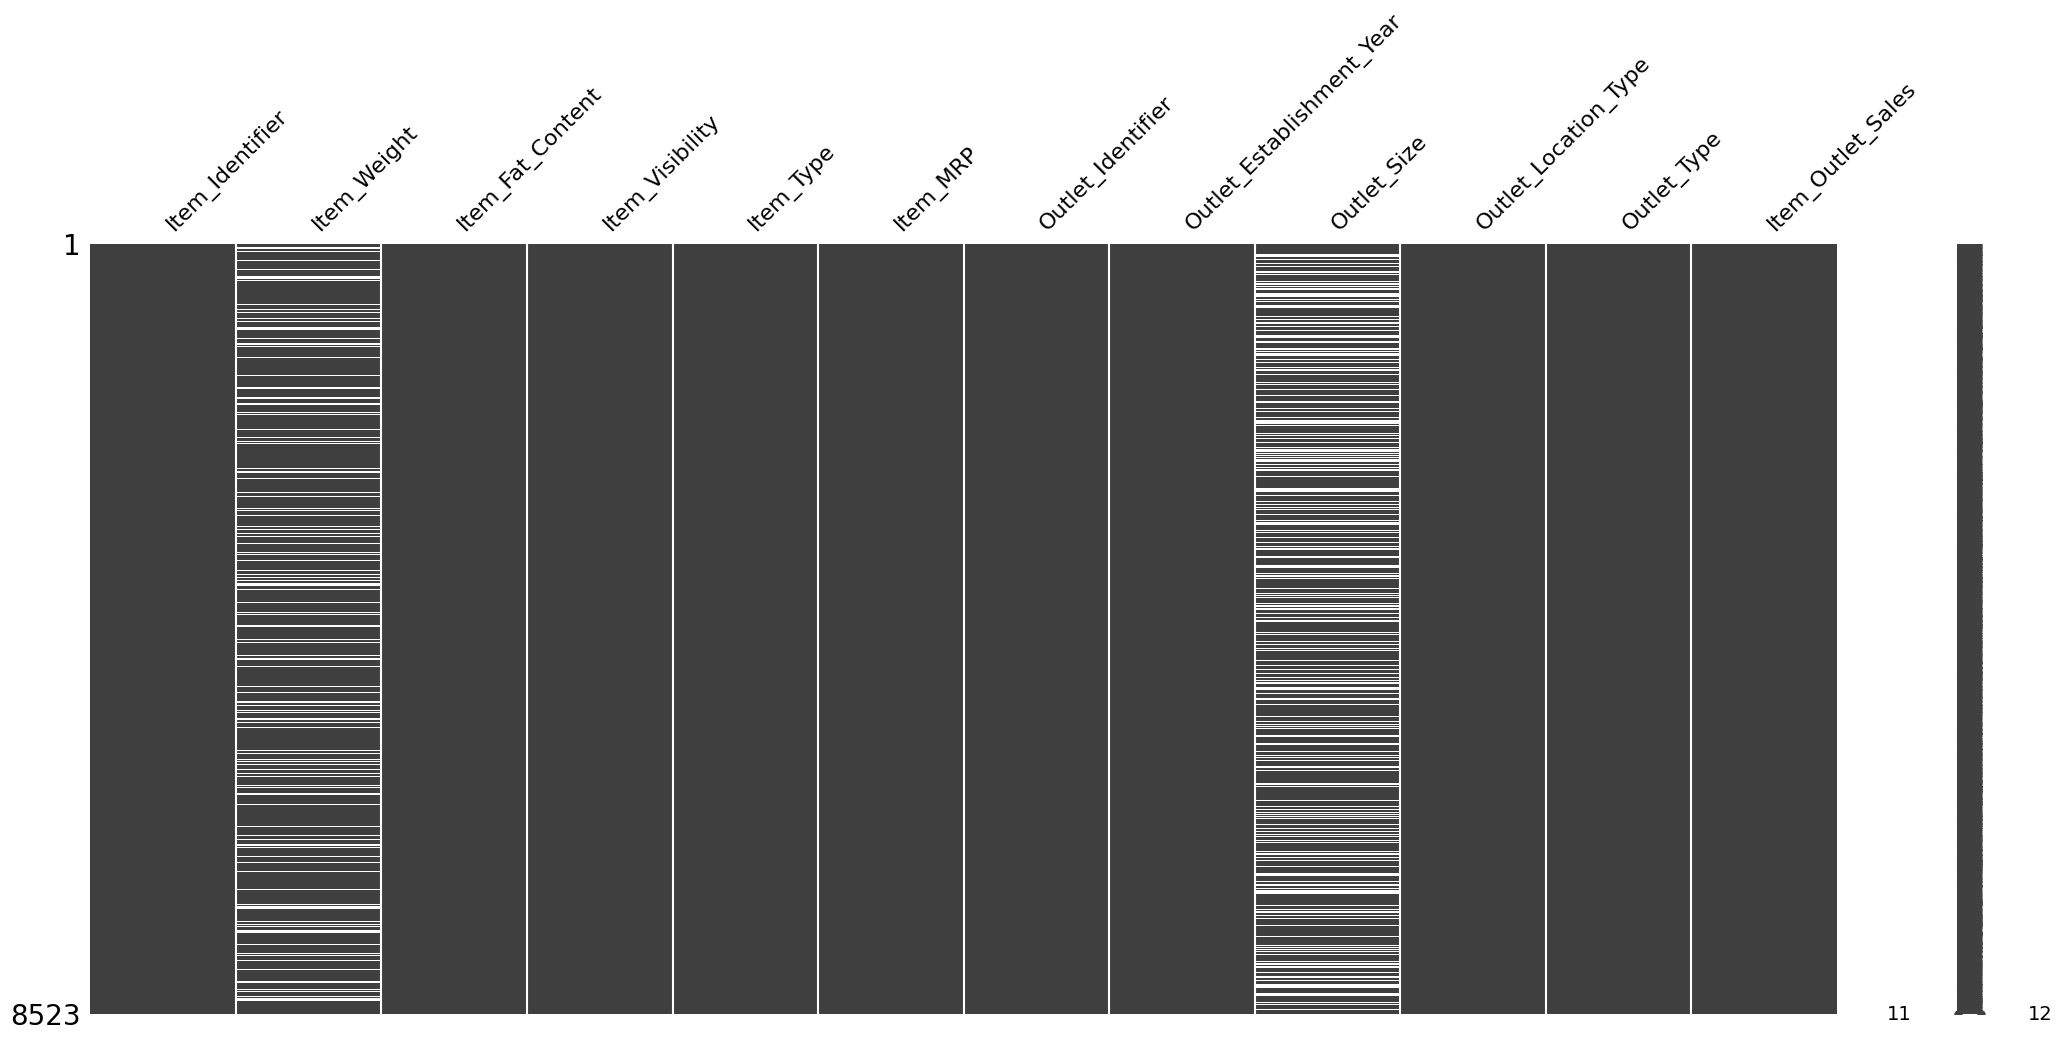

In [ ]:
# Visualize the missing values using the missingno package's matrix plot.
import missingno as msno
msno.matrix(df);

In [ ]:
# saving list of categorical column name. (Hint: select_dtypes)
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# using the list of cat columns to fill null values with MISSING as a placeholder
df[cat_cols] = df[cat_cols].fillna("MISSING")

In [ ]:
# save list of numeric column names (Hint: select_dtypes)
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# use the list of num columns to fill null values with -1, to serve as a placeholder
df[num_cols] = df[num_cols].fillna(-1)

In [ ]:
# Confirm no more nulls using Pandas
null_sums = df.isna().sum()
null_sums

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

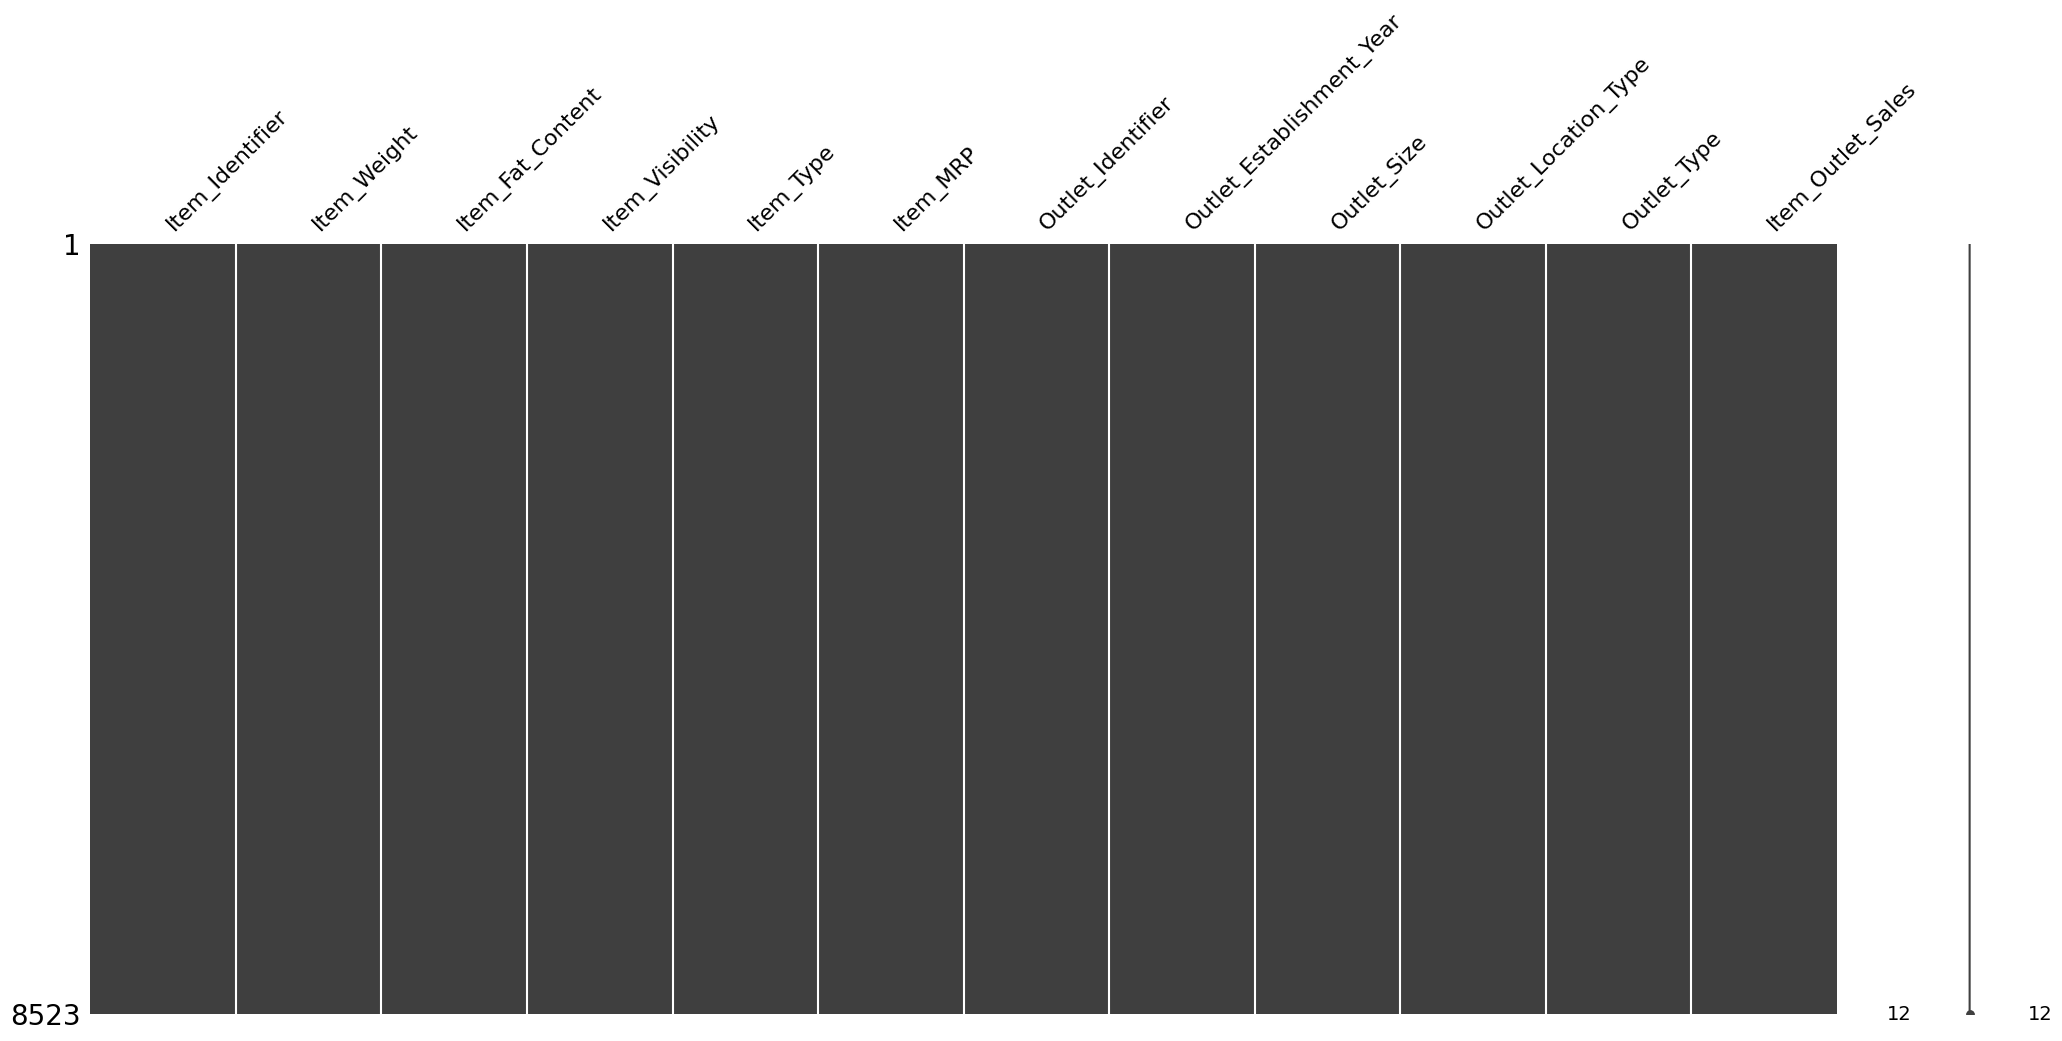

In [ ]:
# Confirming no more nulls using missing no
import missingno as msno
msno.matrix(df)

There are no more missing values.

In [ ]:
# Identify string columns
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


Looks like there are some inconsistencies in the Item_Fat_Content Column. Let's address it.

In [ ]:
# Standardize the values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':'Low Fat', 'reg':'Regular'})
df['Item_Fat_Content'].value_counts()



Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Now the object columns are consistent! Now let's retrieve the summary statistics of any numerical columns.


In [ ]:
# import numpy library
import numpy as np


In [ ]:
# Retrieve summary statistics for numerical data
for col in num_cols:
  print(f"Summary statistics for {col}. Minimum, Maximum and Mean respectively:")
  print(min(df[col]))
  print(max(df[col]))
  print(np.mean(df[col]))
  # Increasing readability by adding an empty line
  print('\n')

Summary statistics for Item_Weight. Minimum, Maximum and Mean respectively:
-1.0
21.35
10.478936407368296


Summary statistics for Item_Visibility. Minimum, Maximum and Mean respectively:
0.0
0.328390948
0.06613202877895108


Summary statistics for Item_MRP. Minimum, Maximum and Mean respectively:
31.29
266.8884
140.9927819781767


Summary statistics for Outlet_Establishment_Year. Minimum, Maximum and Mean respectively:
1985
2009
1997.8318667135984


Summary statistics for Item_Outlet_Sales. Minimum, Maximum and Mean respectively:
33.29
13086.9648
2181.288913575032




# Project 1 - Part 3
For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

Histogram to view the distributions of various features in your dataset.
Boxplot to view statistical summaries of various features in your dataset.
Heatmap of the correlation between features.
Please feel free to add more than the minimum. Remember this is your chance to display your skills!

## Exploratory Data Analysis

In [ ]:
#importing useful packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Checking dtypes again
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# Discovering which columns are our numerical feature columns
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

Let's create histograms and boxplots for the numerical features in our data set

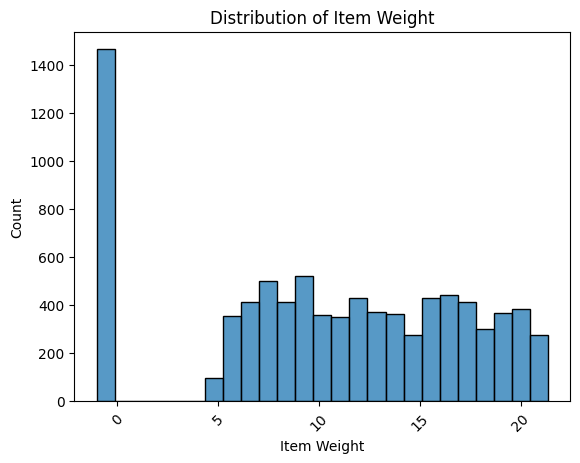

In [ ]:
# Histogram for Item Weight
ax = sns.histplot(data=df, x="Item_Weight")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Item Weight")
ax.set_xlabel("Item Weight");






Text(0.5, 1.0, 'Distribution of Item Weight')

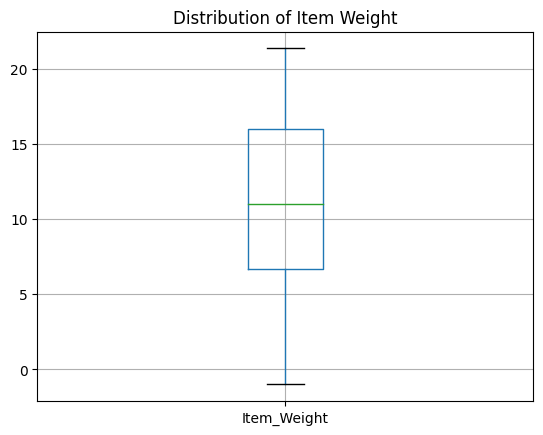

In [ ]:
# Boxplot for Item Weight
ax = df.boxplot(column ="Item_Weight")
ax.set_title("Distribution of Item Weight")


It appears that most items weight between ~6 and ~16 pounds. Items with a negative weight may have missing weights.

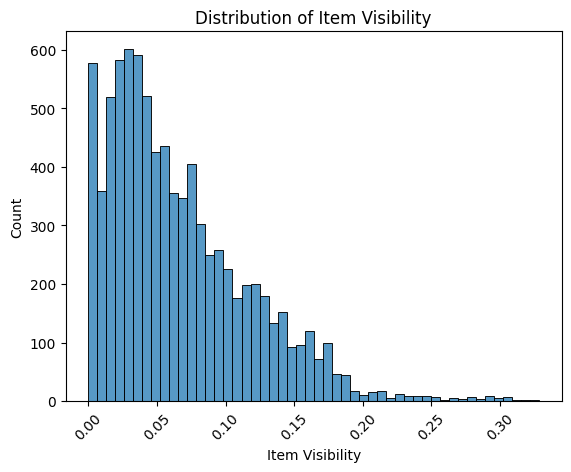

In [ ]:
# Histogram for Item Visibility
ax = sns.histplot(data=df, x="Item_Visibility")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Item Visibility")
ax.set_xlabel("Item Visibility");

Text(0.5, 1.0, 'Distribution of Item Visibility')

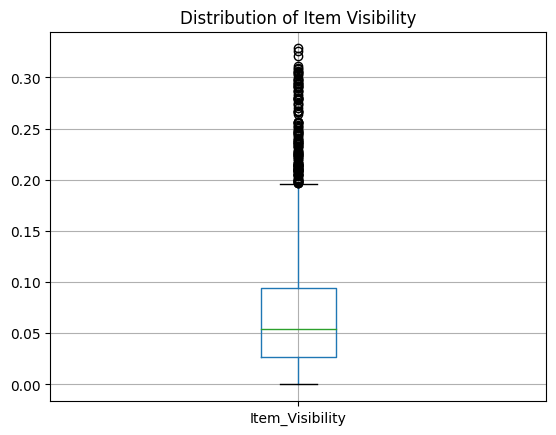

In [ ]:
# Boxplot for Item Visibility
ax = df.boxplot(column ="Item_Visibility")
ax.set_title("Distribution of Item Visibility")

Majority of items appear to have 0-0.1 visibility. With quite a few outliers above 0.2 item visibility.



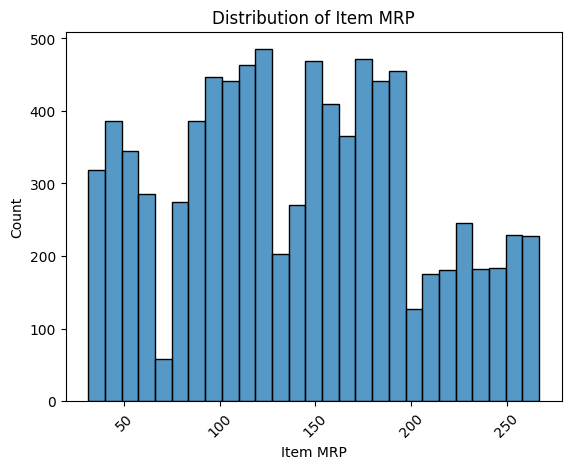

In [ ]:
# Histogram for Item MRP
ax = sns.histplot(data=df, x="Item_MRP")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Item MRP")
ax.set_xlabel("Item MRP");

Text(0.5, 1.0, 'Distribution of Item MRP')

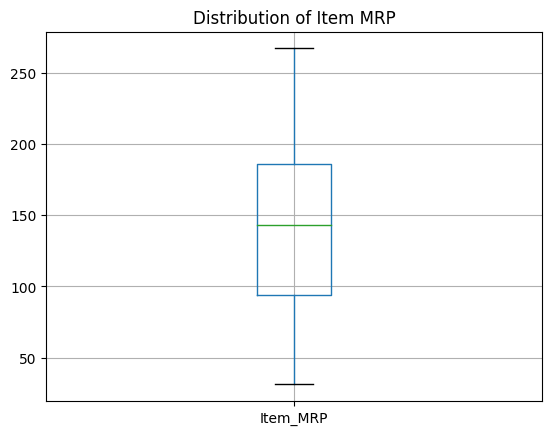

In [ ]:
# Boxplot for Item MRP
ax = df.boxplot(column ="Item_MRP")
ax.set_title("Distribution of Item MRP")

Count of items appear to be pretty evenly distributed based on item MRP. On average being between ~100 to ~190.

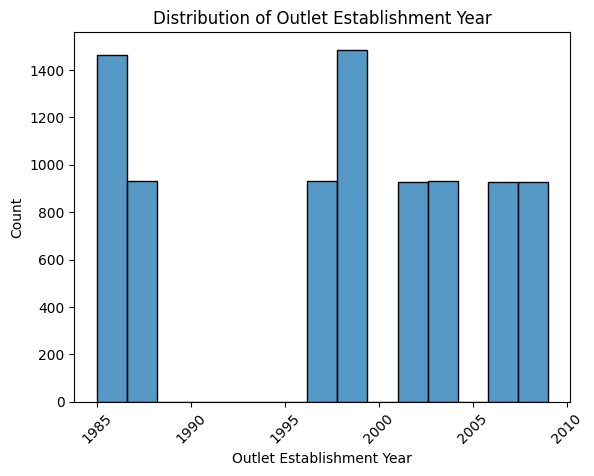

In [ ]:
# Histogram for Outlet Establishment Year
ax = sns.histplot(data=df, x="Outlet_Establishment_Year")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Outlet Establishment Year")
ax.set_xlabel("Outlet Establishment Year");

Text(0.5, 1.0, 'Outlet Establishment Year')

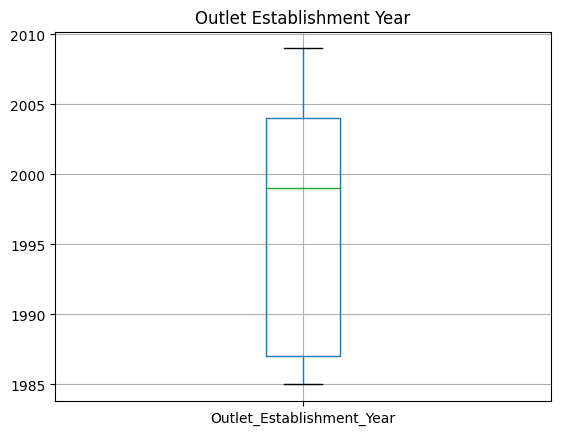

In [ ]:
# Boxplot for Outlet Establishment Year
ax = df.boxplot(column ="Outlet_Establishment_Year")
ax.set_title("Outlet Establishment Year")

Items appear to have been made between 1985-1988, 1996-1999, 2001-2004 and 2006-2009.

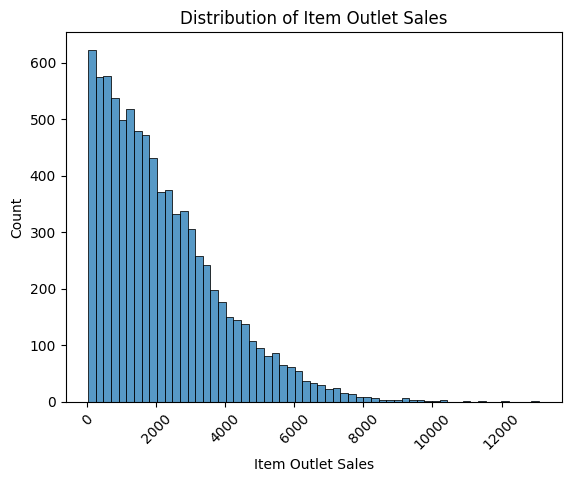

In [ ]:
# Histogram for Outlet Establishment Year
ax = sns.histplot(data=df, x="Item_Outlet_Sales")
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);
ax.set_title("Distribution of Item Outlet Sales")
ax.set_xlabel("Item Outlet Sales");

Text(0.5, 1.0, 'Item Outlet Sales')

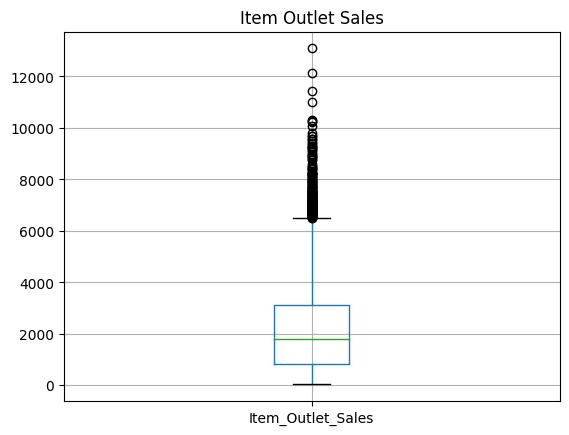

In [ ]:
# Boxplot for Item Outlet Sales
ax = df.boxplot(column ="Item_Outlet_Sales")
ax.set_title("Item Outlet Sales")

Majority of outlets appear to have sold less than 6000 items. With quite a few outliers selling over 6000 items.


In [ ]:
# Discovering which columns are our categorical feature columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Let's get the countplots of the relevant categorical columns

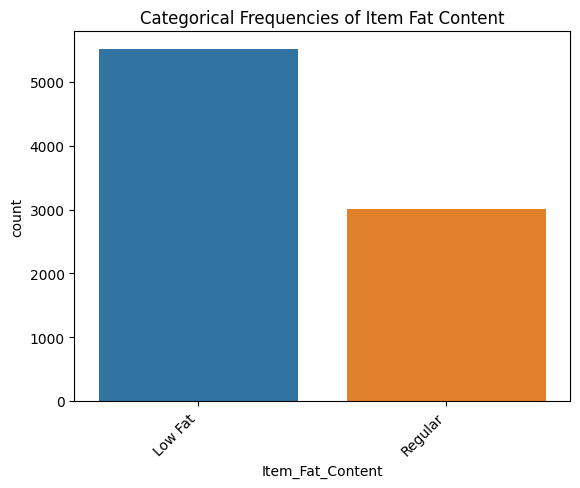

In [ ]:
# Univariate countplot of Item Fat Content
ax = sns.countplot(data=df, x='Item_Fat_Content')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Item Fat Content");

It looks like the majority of items have low fat, fat content.

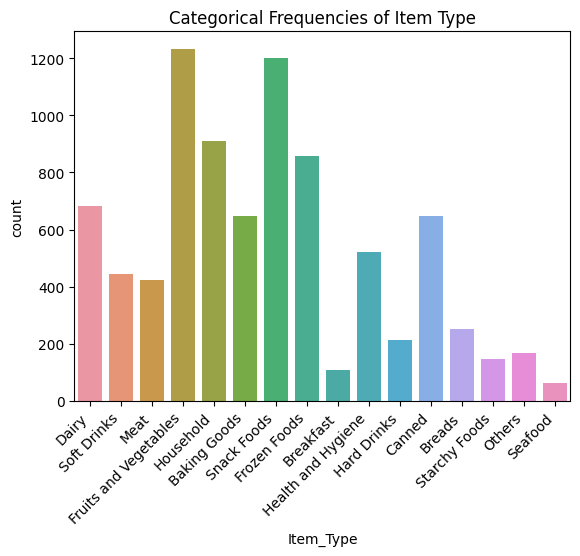

In [ ]:
# Univariate countplot of Item Type
ax = sns.countplot(data=df, x='Item_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Item Type");

The most popular item sold appears to be fruits and vegetables. The least popular appears to be seafood.

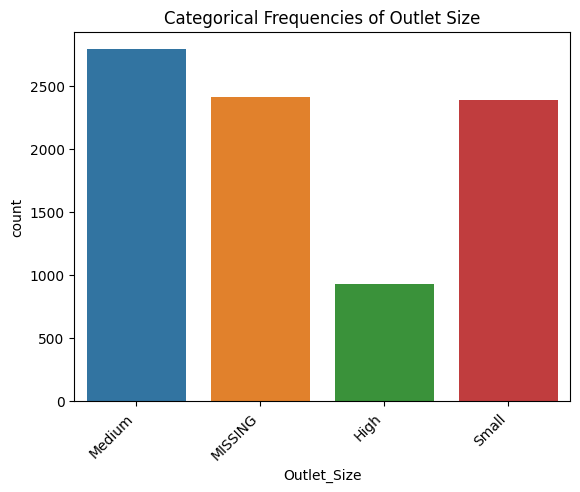

In [ ]:
# Univariate countplot of Outlet Size
ax = sns.countplot(data=df, x='Outlet_Size')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Outlet Size");

The majority of outlets appear to be of medium size. However, there is quite a bit of missing data, so this may not be accurate.


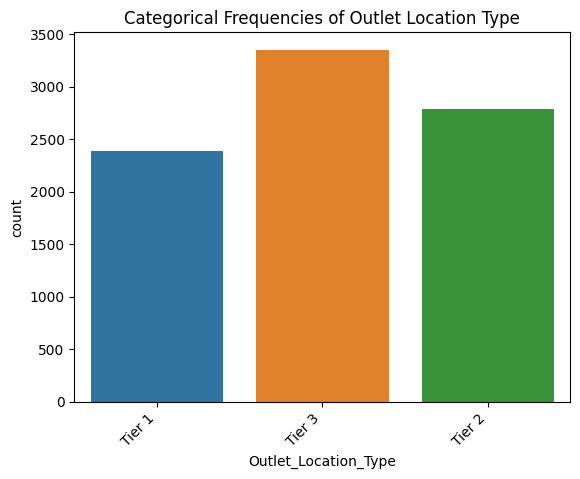

In [ ]:
# Univariate countplot of Outlet Location Type
ax = sns.countplot(data=df, x='Outlet_Location_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Outlet Location Type");

It appears the majority of outlets are of Tier 3 location type.

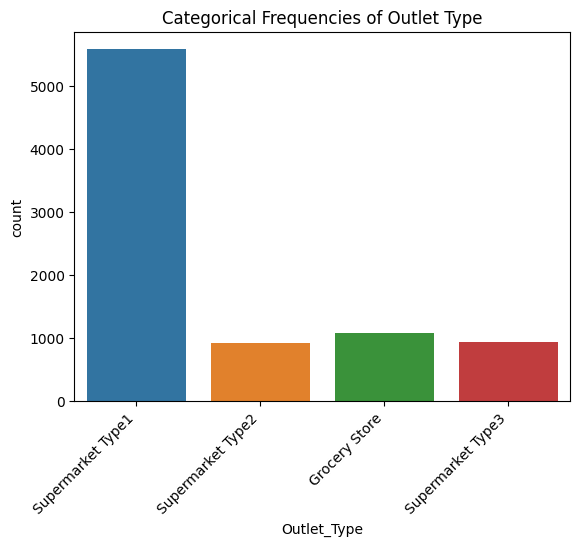

In [ ]:
# Univariate countplot of Outlet Type
ax = sns.countplot(data=df, x='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
ax.set_title("Categorical Frequencies of Outlet Type");

It would appear the majority of outlets are Supermarket Type 1 type. And a few of them are Supermarket Type 2 type.

Let's create a heatmap to get the correlation between features.

<ipython-input-103-a7d0e1c19c21>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues');


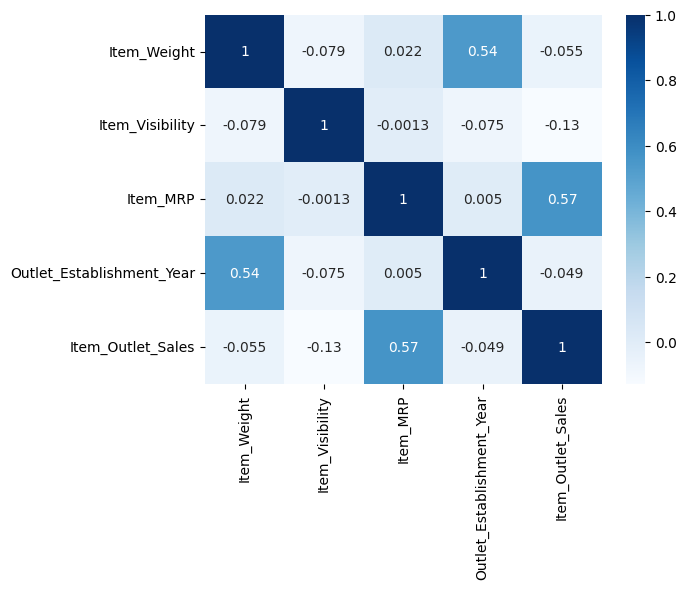

In [ ]:
#correlation between features
sns.heatmap(df.corr(),annot=True,cmap='Blues');

* There aren't very strong correlations here.
* It appears that Outlet Establisment Year and Item Weight have a moderate positive correlation as well as Item MRP and Item Outlet Sales.
* Item Outlet Sales and Item Visibility also has a weak negative correlation.
* The other correlations appear to be negligible.



## Explanatory Data Analysis